In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_csv('data(1).csv')

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
# Shapes

In [11]:
shape = df.shape
print("The number of rows is:", shape[0])
print("The number of columns is:", shape[1])

The number of rows is: 6362620
The number of columns is: 11


In [12]:
# missing values

In [13]:
missing_values = df.isnull().sum().sum()
if (missing_values > 0):
    print("There are missing values!")
else:
    print("There are no missing values!")

There are no missing values!


In [14]:
# Display basic statistics for the amount column using the describe() method.

In [15]:
statistics = df['amount'].describe()
print(statistics)

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64


In [16]:
# Plot a bar graph showing the count of each transaction type.

In [32]:
# Count the occurrence of each transaction type
transaction_counts = df['type'].value_counts()

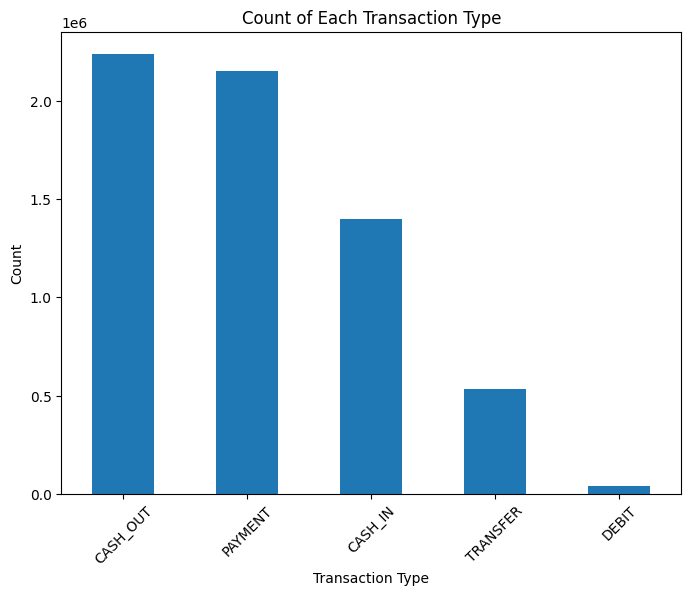

In [18]:
# Plot the bar graph
plt.figure(figsize=(8, 6))
transaction_counts.plot(kind='bar')
plt.title('Count of Each Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Which transaction type is the most frequent? The Cash_out 

In [35]:
# Get the most frequent transaction type
most_frequent_type = transaction_counts.idxmax()

print("The most frequent transaction type is:", most_frequent_type)

The most frequent transaction type is: CASH_OUT


In [20]:
# Plot a histogram of the transaction amounts to understand its distribution.

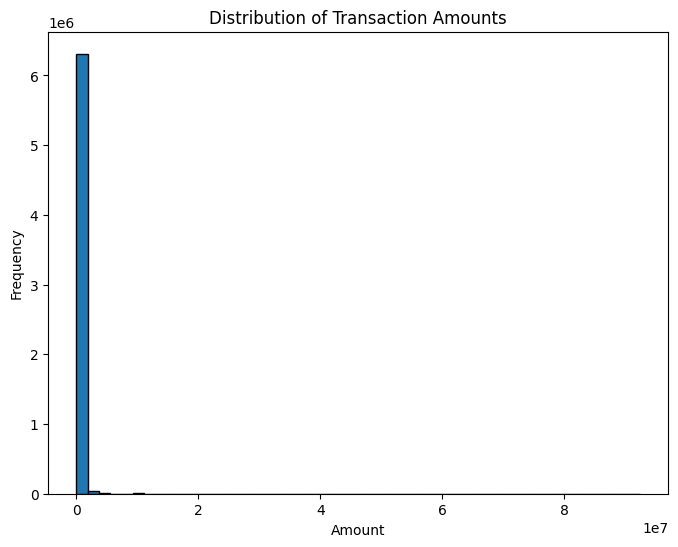

In [36]:
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['amount'], bins=50, edgecolor='k')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Do most transactions involve smaller or larger amounts? It involves smaller amounts because histogram is skewed to smaller amounts!

In [23]:
#Using a pie chart, visualize the proportion of fraudulent vs. non-fraudulent transactions.

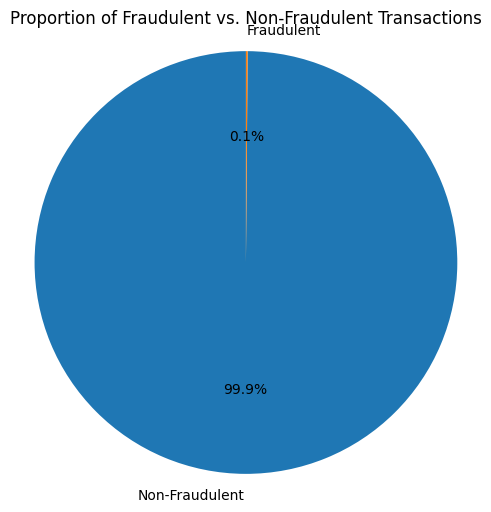

In [37]:

# Count the occurrence of fraudulent and non-fraudulent transactions
fraud_counts = df['isFraud'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Fraudulent vs. Non-Fraudulent Transactions')
plt.axis('equal')
plt.show()

<Figure size 800x600 with 0 Axes>

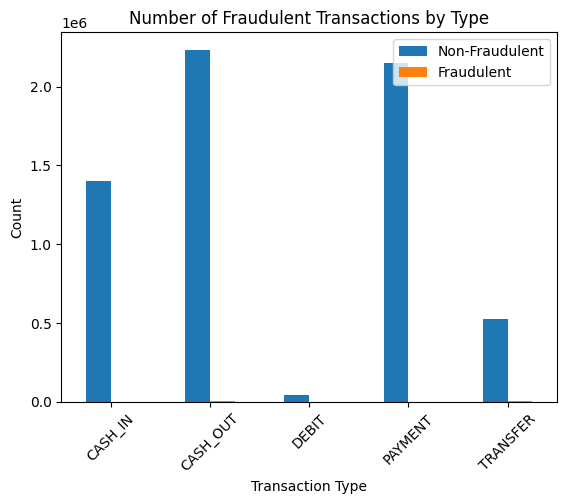

In [39]:
# Plot a bar graph comparing the number of each transaction type that's marked as fraudulent. 

# Group the data by transaction type and isFraud, and count the occurrences
fraud_by_type = df.groupby(['type', 'isFraud']).size().unstack()

# Plot the bar graph
plt.figure(figsize=(8, 6))
fraud_by_type.plot(kind='bar')
plt.title('Number of Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [ ]:
#Which transaction type is most commonly marked as fraudulent? The Cashout and Transfer

In [27]:
# Plot a scatter plot with oldbalanceOrg on the x-axis and newbalanceOrig on the y-axis. 

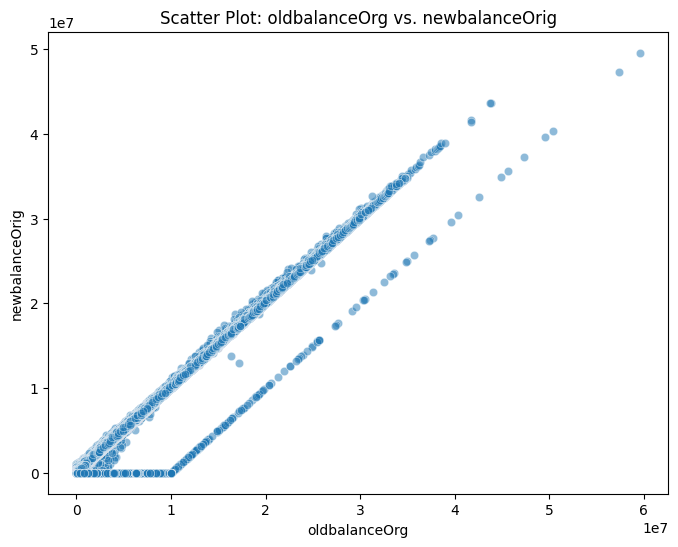

In [42]:
# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='oldbalanceOrg', y='newbalanceOrig', alpha=0.5)
plt.title('Scatter Plot: oldbalanceOrg vs. newbalanceOrig')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.show()

In [ ]:
#Can you identify any patterns?Positive linear relationship: It shows a positive linear relationship, it means that as the old balance of the origin account increases, the new balance of the origin account also tends to increase. This pattern suggests that transactions are more likely to result in higher balances in the origin account.

In [43]:
# Visualize this using a bar chart.

In [31]:
#Are all flagged fraud transactions also marked as fraud in the isFraud column?All flagged fraud transactions are marked as fraud in the isFraud column.

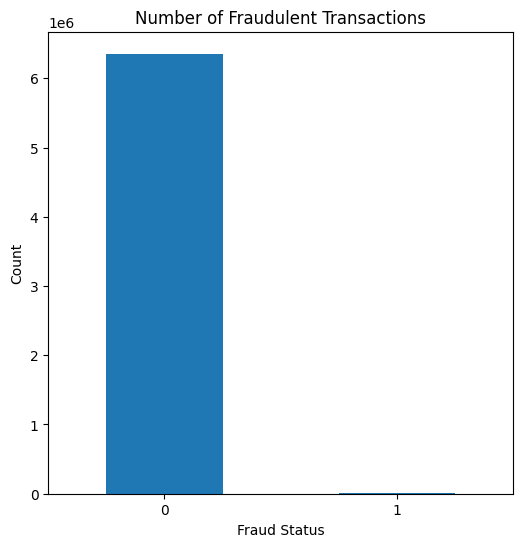

In [47]:

# Count the occurrences of fraudulent transactions
fraud_counts = df['isFraud'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 6))
fraud_counts.plot(kind='bar')
plt.title('Number of Fraudulent Transactions')
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [49]:
# Count the occurrences of flagged fraud transactions
fraud_count = df['isFraud'].sum()

print("Number of transactions flagged as fraud:", fraud_count)

Number of transactions flagged as fraud: 8213
